In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Add the 'utils' folder to the module search path
utils_path = os.path.abspath(os.path.join('utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)
from utils import myUtilsML

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [2]:
file_path = '../dati/processed/fe_data.csv'

# Read the CSV file with the defined schema
df = pd.read_csv(file_path)

df.head(3)

,id_claim_hash,cd_dealer_hash,failure_date,vin_hash,claim_status_Z002,claim_status_Z005,claim_status_Z010,claim_status_Z011,claim_status_Z012,claim_status_Z013,claim_status_Z014,claim_status_Z015,claim_status_Z021,claim_status_Z026,claim_status_Z027,claim_status_Z030,claim_status_Z031,claim_status_Z032,claim_status_Z035,claim_status_Z037,claim_status_Z070,claim_status_Z075,claim_status_Z076,claim_status_Z080,claim_status_Z084,claim_status_Z092,claim_status_Z094,claim_status_ZT14,claim_type_ZW01,claim_type_ZW06,product_division_BUS,business_unit_des_BU TRUCKS -HEAVY RANGE,business_unit_des_BU TRUCKS -MEDIUM RANGE,business_unit_des_COMMERCIAL VEHICLES B.U.,business_unit_des_OTHERS,part_number_des_-E1,part_number_des_-E3,part_number_des_-ECONOMY,part_number_des_-ECONOMY50,cd_decision_D,cd_decision_P,cd_decision_V,item_type_FR,item_type_MAT,total_work_hours
0,000033d421b8e313d9d310f5c33bcbef7e979e85654ba6bbb857a68bda27625d,e5b9348959428c8e92d59b757174f78bfcdea92c151a2470a01b25af9dd869c8,2021-11-16,ee3413f99be8410f19c204a0cfd480ab8055c7a5f71cdedcb2fb6a5195b56e1d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.7
1,0000405d68b5be91184b9f7a026e1270ebea14a1e30d093846bc1df2362c6815,82e0ffc3254bf04327e3541637d4b59f59f9b7241bf732907acd8648b4c7720a,2020-03-02,db9b5f7fb6d3282faf2a47a7d747d2181357abe0ece531d8125395e331889c72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0.4
2,000060ab51ca9327824ddda658b454298ed36b8799f1589eee49481149386da5,90097d7e42cb88a7136c54b8d4447109c4bec47c04b7ac9b79288b7e5ad82631,2020-09-23,61b6d2b8ea0c0503754cdbcad8d425f05145f4c655bd07303eee13d3adfd1a46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.6


In [3]:
# Get a list of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

print("# Numeric columns:", len(numeric_columns))
print("Numeric columns:", numeric_columns)

# Numeric columns: 41
Numeric columns: ['claim_status_Z002', 'claim_status_Z005', 'claim_status_Z010', 'claim_status_Z011', 'claim_status_Z012', 'claim_status_Z013', 'claim_status_Z014', 'claim_status_Z015', 'claim_status_Z021', 'claim_status_Z026', 'claim_status_Z027', 'claim_status_Z030', 'claim_status_Z031', 'claim_status_Z032', 'claim_status_Z035', 'claim_status_Z037', 'claim_status_Z070', 'claim_status_Z075', 'claim_status_Z076', 'claim_status_Z080', 'claim_status_Z084', 'claim_status_Z092', 'claim_status_Z094', 'claim_status_ZT14', 'claim_type_ZW01', 'claim_type_ZW06', 'product_division_BUS', 'business_unit_des_BU TRUCKS -HEAVY RANGE', 'business_unit_des_BU TRUCKS -MEDIUM RANGE', 'business_unit_des_COMMERCIAL VEHICLES B.U.', 'business_unit_des_OTHERS', 'part_number_des_-E1', 'part_number_des_-E3', 'part_number_des_-ECONOMY', 'part_number_des_-ECONOMY50', 'cd_decision_D', 'cd_decision_P', 'cd_decision_V', 'item_type_FR', 'item_type_MAT', 'total_work_hours']


The one-hot encoder has produced a considerable number of variables. To reduce the dimensionality and ensure the orthogonality of the features, we apply the PCA method. We then evaluate the number of PCs to define based on how much variance of the original dataset we want to retain

In [4]:
df_pca, pca_model, loadings = myUtilsML.pipeline_standard_pca(df, numeric_columns, 41)

Explained variance by each principal component:  [0.05161034 0.04711062 0.04217937 0.03755977 0.034207   0.03131807
 0.03030418 0.0266511  0.0258463  0.02464346 0.02446226 0.02441381
 0.024399   0.02439421 0.02439291 0.02439221 0.0243918  0.02439139
 0.02439089 0.02439079 0.02439077 0.02439067 0.02439046 0.02439039
 0.02439031 0.02438854 0.02438713 0.02438492 0.02438008 0.0243689
 0.02431018 0.02398254 0.02270642 0.02140409 0.01965976 0.01832341
 0.01467908 0.01115674 0.00212626 0.00190794 0.00043192]
Total variance explained: 1.00


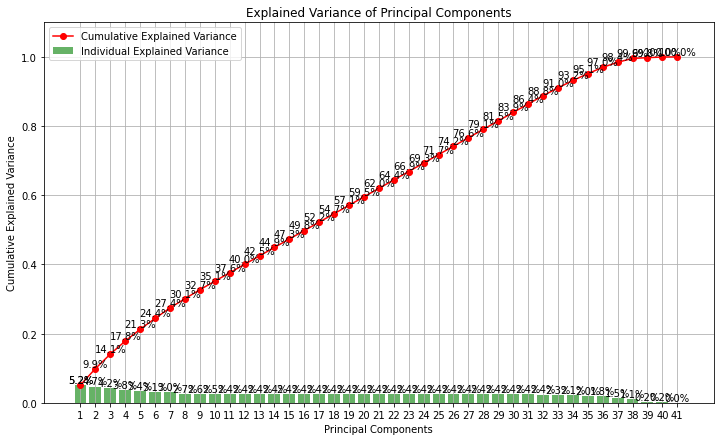

In [5]:
myUtilsML.cumulative_pca_with_variance(pca_model)


In Principal Component Analysis (PCA), loadings are a crucial concept that helps interpret the relationship between the original variables and the principal components. Loadings are the coefficients or weights that link the original variables to the principal components. They indicate how much each original variable contributes to each principal component
The following heatmap defines the weight of each original feature with respect to the PCs:

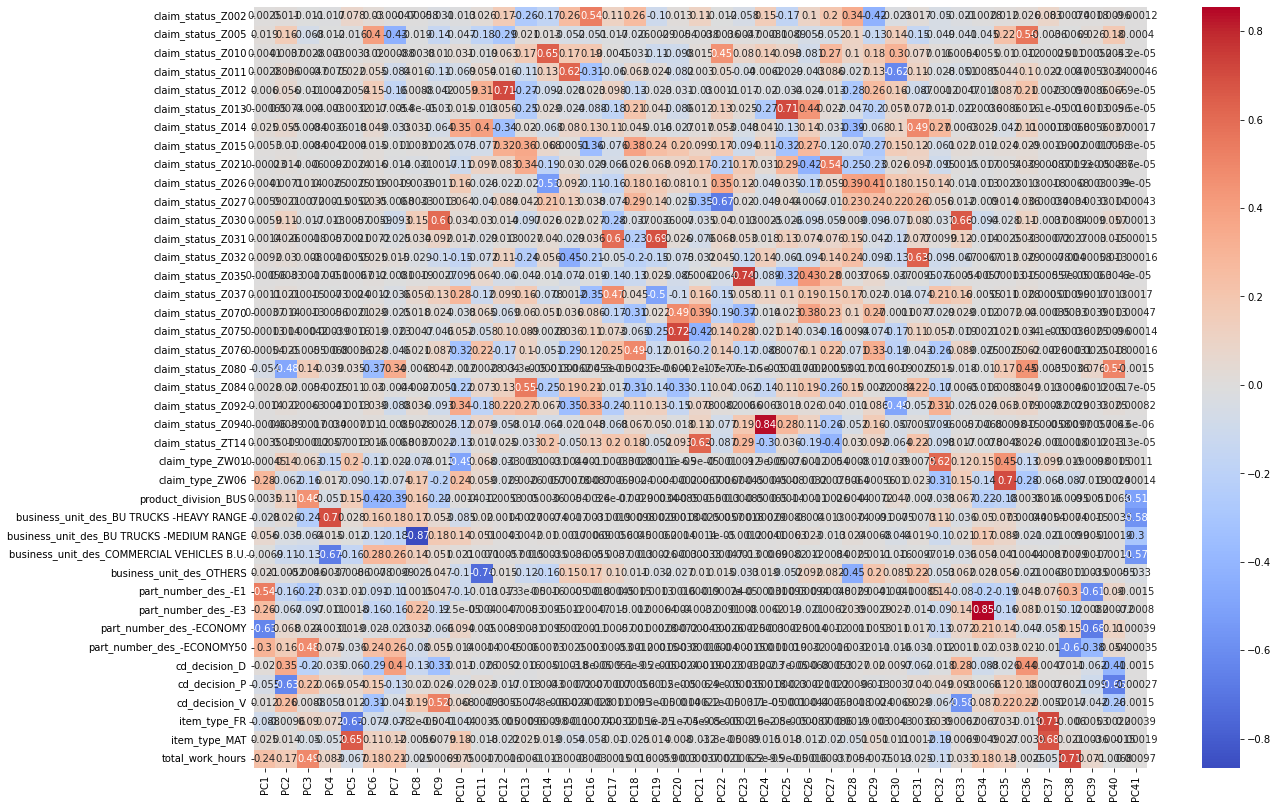

In [6]:
plt.figure(figsize=(20, 14))
sns.heatmap(loadings,annot=True, cmap='coolwarm')
plt.show()

Choose the number of principal components to retain at least 70% of the variance. This also ensures the removal of any noise in the data, that is, residual information that could affect the subsequent anomaly detection algorithm

In [7]:
df_pca, pca_model, loadings = myUtilsML.pipeline_standard_pca(df, numeric_columns, 25)

Explained variance by each principal component:  [0.05160994 0.04710997 0.0421762  0.03755054 0.03420324 0.03128015
 0.03028636 0.02662648 0.02579379 0.02463062 0.0244588  0.02441029
 0.02439826 0.02439412 0.02439225 0.02439168 0.02439141 0.02439121
 0.02439074 0.02439067 0.02439044 0.02439041 0.02438928 0.02438916
 0.02438678]
Total variance explained: 0.72


In [8]:
df_pca.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,id_claim_hash,cd_dealer_hash,failure_date,vin_hash
0,-0.659891,-0.232336,1.048971,0.028398,0.235855,-0.920835,-1.024606,0.27941,-0.445188,0.315943,-0.065424,-0.004464,0.009741,0.006988,-0.001164,0.00235,-0.004395,0.000411,-0.000232,-0.000347,-0.000414,-0.000837,0.005042,-0.005215,0.007689,000033d421b8e313d9d310f5c33bcbef7e979e85654ba6bbb857a68bda27625d,e5b9348959428c8e92d59b757174f78bfcdea92c151a2470a01b25af9dd869c8,2021-11-16,ee3413f99be8410f19c204a0cfd480ab8055c7a5f71cdedcb2fb6a5195b56e1d
1,-0.701266,-0.726366,-0.29334,-1.24809,-0.438056,0.579486,0.404972,0.230904,0.142726,0.362619,-0.014995,0.025037,-0.004353,-0.000688,0.001664,-0.007489,0.002276,-0.000889,0.000133,0.001089,0.001286,0.003012,-0.015646,0.006524,0.00989,0000405d68b5be91184b9f7a026e1270ebea14a1e30d093846bc1df2362c6815,82e0ffc3254bf04327e3541637d4b59f59f9b7241bf732907acd8648b4c7720a,2020-03-02,db9b5f7fb6d3282faf2a47a7d747d2181357abe0ece531d8125395e331889c72
2,-0.665772,-0.236491,1.036645,0.026185,0.23738,-0.925013,-1.029952,0.279735,-0.444718,0.313998,-0.065435,-0.004388,0.009805,0.007276,-0.001176,0.002418,-0.004432,0.000386,-0.000239,-0.000346,-0.000427,-0.00086,0.005137,-0.005256,0.007854,000060ab51ca9327824ddda658b454298ed36b8799f1589eee49481149386da5,90097d7e42cb88a7136c54b8d4447109c4bec47c04b7ac9b79288b7e5ad82631,2020-09-23,61b6d2b8ea0c0503754cdbcad8d425f05145f4c655bd07303eee13d3adfd1a46


We apply the Isolation Forest algorithm to quickly identify anomalous points, defined as points that are easily isolated compared to others. Non-anomalous points are considered to cluster together with other points. The algorithm is an ensemble learning method that randomly generates a set of binary trees (called isolation trees). The height of a tree, which is the number of splits needed to isolate a point, is used to determine if the point is an outlier. Outliers tend to be isolated with fewer splits compared to normal points

In [9]:
pc_columns = [col for col in df_pca.columns if col.startswith('PC')]

#df_clustered = myUtilsML.defineClustering(df_pca, eps=0.5, min_samples=5, features_col=pc_columns)
df_anom_detected = myUtilsML.defineAnomalyDetection(df_pca, features_col=pc_columns)

In [10]:
df_anom_selected = df_anom_detected[['id_claim_hash', 'anomaly']]
df_merged = df.merge(df_anom_selected, on='id_claim_hash', how='left')

In [11]:
df_merged.head()

,id_claim_hash,cd_dealer_hash,failure_date,vin_hash,claim_status_Z002,claim_status_Z005,claim_status_Z010,claim_status_Z011,claim_status_Z012,claim_status_Z013,claim_status_Z014,claim_status_Z015,claim_status_Z021,claim_status_Z026,claim_status_Z027,claim_status_Z030,claim_status_Z031,claim_status_Z032,claim_status_Z035,claim_status_Z037,claim_status_Z070,claim_status_Z075,claim_status_Z076,claim_status_Z080,claim_status_Z084,claim_status_Z092,claim_status_Z094,claim_status_ZT14,claim_type_ZW01,claim_type_ZW06,product_division_BUS,business_unit_des_BU TRUCKS -HEAVY RANGE,business_unit_des_BU TRUCKS -MEDIUM RANGE,business_unit_des_COMMERCIAL VEHICLES B.U.,business_unit_des_OTHERS,part_number_des_-E1,part_number_des_-E3,part_number_des_-ECONOMY,part_number_des_-ECONOMY50,cd_decision_D,cd_decision_P,cd_decision_V,item_type_FR,item_type_MAT,total_work_hours,anomaly
0,000033d421b8e313d9d310f5c33bcbef7e979e85654ba6bbb857a68bda27625d,e5b9348959428c8e92d59b757174f78bfcdea92c151a2470a01b25af9dd869c8,2021-11-16,ee3413f99be8410f19c204a0cfd480ab8055c7a5f71cdedcb2fb6a5195b56e1d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.7,1
1,0000405d68b5be91184b9f7a026e1270ebea14a1e30d093846bc1df2362c6815,82e0ffc3254bf04327e3541637d4b59f59f9b7241bf732907acd8648b4c7720a,2020-03-02,db9b5f7fb6d3282faf2a47a7d747d2181357abe0ece531d8125395e331889c72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0.4,1
2,000060ab51ca9327824ddda658b454298ed36b8799f1589eee49481149386da5,90097d7e42cb88a7136c54b8d4447109c4bec47c04b7ac9b79288b7e5ad82631,2020-09-23,61b6d2b8ea0c0503754cdbcad8d425f05145f4c655bd07303eee13d3adfd1a46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.6,1
3,000080bda782b7aa716599931bab73fb217bb6a4491b1f7e6c81284537eb8cdb,40def02de8ca6f1ae7d0c8668d05b9f97839559e57fbb1c56b19a53a038a7f68,2021-05-06,a1a7b17a1e58d2833b3a121db634e296a3f6eca7dd32dde043104313009c0d87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,2.0,1
4,0000938a2b4ef274630932521b7c1ea31cceabab6358e842dc4730bab62bcd27,4e30a813b12a86eef5413cc30795b825558f7eb39a7d091d5c3864546e006505,2021-07-13,44f012c9ac988909f53df75eec76993300021d3ad6245d6ef76c042489a9a524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0.5,1


In [12]:
anomalies = df_merged[df_merged['anomaly'] == -1]
print("# anomalies: {} ({}%)".format(anomalies.shape[0],round(anomalies.shape[0]/df_merged.shape[0]*100,2)))

# anomalies: 4112 (1.0%)


In [13]:
# Specify the path for the output CSV file
csv_file_path = '../dati/processed/clustered_data.csv'
csv_directory = os.path.dirname(csv_file_path)
print("Path: {}".format(csv_directory))

# Create the directory if it does not exist
if not os.path.exists(csv_directory):
    os.makedirs(csv_directory)

# Save the DataFrame to the CSV file
df_merged.to_csv(csv_file_path, index=False)

Path: ../dati/processed
